# Machine Learning For Diabetes

# Project Name: Diabetes Prediction

### Project Done By:

#### PRANJAL CHOWDHURY (CSE / 3RD / IEM)
#### PARTHO PROTIM SARKAR (CSE / 3RD / IEM)
#### DEB SHOHAG DAS (CSE / 3RD / IEM)
#### SAIKAT SANA (ECE / 3RD/ UEM)

### Problem Statement:

- We have to build a predictive model which shall predict the diabetes of a patient as a linear function of other attributes

### Dataset description:

- There are total 442 instances in the dataset
- Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients
- Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

One can find more about the dataset [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

### Steps of our project:

- [Importing the dataset and understanding the dataset](#Import-the-datasets-and-understanding-the-dataset) 
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modelling](#Modelling)
- [Evaluation of the Model](#Evaluation-of-the-Model)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_set=pd.read_csv("data_set.csv")
print(data_set.shape)

(442, 11)


In [3]:
data_set.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


# Diabetes prediciton is classification task

check databalance which is quite good

In [4]:
data_set.Y.value_counts()

200    6
72     6
178    5
71     5
90     5
52     4
59     4
96     4
131    4
128    4
275    4
55     4
202    4
53     4
281    4
77     4
88     4
150    4
104    4
97     4
109    4
91     4
84     4
144    4
85     4
63     4
142    4
65     4
220    4
69     3
      ..
123    1
125    1
126    1
136    1
145    1
146    1
147    1
148    1
153    1
154    1
341    1
161    1
162    1
166    1
167    1
171    1
175    1
177    1
183    1
184    1
186    1
187    1
189    1
192    1
195    1
199    1
201    1
208    1
209    1
25     1
Name: Y, Length: 214, dtype: int64

<Figure size 864x720 with 0 Axes>

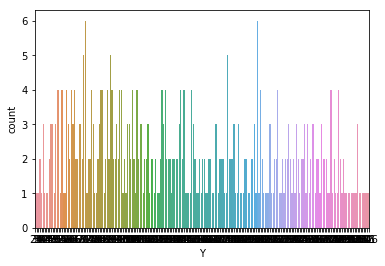

<Figure size 864x720 with 0 Axes>

In [8]:
import seaborn as sns
sns.countplot(data_set['Y'],label="Count")
plt.figure(figsize=(12,10))




In [ ]:

data_set.isna().sum()

In [ ]:
data_set.dtypes

In [ ]:
data_set.columns.tolist()

In [ ]:

data_set[['AGE',
          'SEX',
         'BMI',
         'BP',
         'S1',
         'S2',
         'S3',
         'S4',
         'S5',
         'S6',
         'Y']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

# outlier cleaning

###### AGE more than 70 is ideally not good so we consider it as outlier


###### Body mass index is weight to height ration so weight less than 12 is not range of adults so we consider it  as outlier

###### bloodpressure lower than 50 is criticly low pressure so we consider it as outlier

###### removed all outlier

In [ ]:
data_set=data_set[data_set['AGE']<=70]

In [ ]:
data_set=data_set[data_set['BMI']>=12]

In [ ]:
data_set=data_set[data_set['BP']>50]

In [ ]:
data_set=data_set[data_set['SEX']>1]

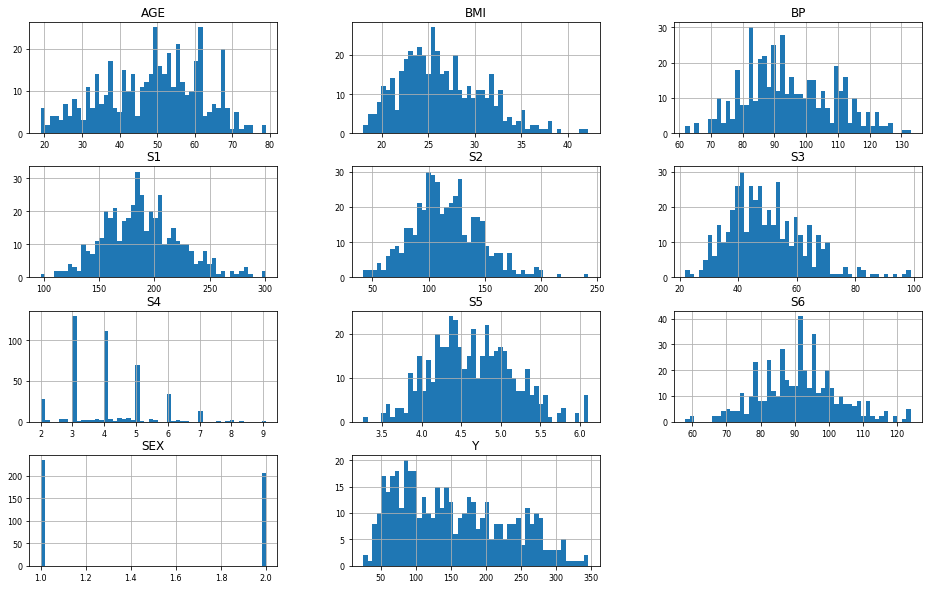

In [9]:
data_set[['AGE',
          'SEX',
         'BMI',
         'BP',
         'S1',
         'S2',
         'S3',
         'S4',
         'S5',
         'S6',
         'Y']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

# Correlation

 after removal of outlier you can check distribution is likely normal

we are going to use correlation for finding independent variable correlation

In [ ]:

from sklearn.preprocessing import Normalizer
normalized_application = Normalizer().fit_transform(data_set[['AGE',
          'SEX',
         'BMI',
         'BP',
         'S1',
         'S2',
         'S3',
         'S4',
         'S5',
         'S6',
         'Y']])
#print (normalized_application)

normal_df=pd.DataFrame(normalized_application)
normal_df.columns=['AGE',
          'SEX',
         'BMI',
         'BP',
         'S1',
         'S2',
         'S3',
         'S4',
         'S5',
         'S6',
         'Y']

cor=normal_df.corr()
plt.figure(figsize=(8,8))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.heatmap(cor, vmax=1, square=True,annot=True,cmap=flatui)
plt.title('Correlation between different fearures')

# Check linearity in above graph which is good sign of correlation

In [ ]:
data_set.isna().sum()

In [ ]:
normal_df.isna().sum()

In [ ]:
print(data_set.shape)
print(normal_df.shape)

In [ ]:
data_set=data_set.reset_index(drop=True)

In [ ]:
normal_df=normal_df.reset_index(drop=True)

In [ ]:
normal_df['Y'] = data_set.Y.values

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(normal_df, test_size=0.30)

In [ ]:

print(df_train.shape)
print(df_val.shape)

# Logistic classification model 

with good algorithm we can achieve more accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
features = normal_df.drop(["Y"], axis=1).columns

logreg = LogisticRegression().fit(df_train[features], df_train['Y'])



print("Training set score: {:.3f}".format(logreg.score(df_train[features], df_train['Y'])))
print("Validation set score: {:.3f}".format(logreg.score(df_val[features], df_val['Y'])))

### Exploratory Data Analysis

Printing the summary statistics of the dataset

In [ ]:
type(data_set)

In [ ]:
data_set.shape

In [ ]:
data_set.iloc[[2], [3]] 

In [ ]:
data_set.loc[3,['Y']]

In [ ]:
Y=data_set .loc[:,['Y']]

In [ ]:
type(Y)

In [ ]:
Y.shape

In [ ]:
Y_values = data_set.loc[:,['Y']].values
type(Y_values)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mean_Y = np.mean(Y_values)
mean_Y

In [ ]:
std_dev = np.mean(Y_values)
std_dev

In [ ]:
plt.figure(figsize = (10,8))
plt.hist(Y_values)

In [ ]:
np.median(Y_values)

In [ ]:
min_Y = np.min(Y_values)
max_Y = np.max(Y_values)
range_Y = max_Y - min_Y

print("min: {}, max: {}, range: {}".format(min_Y, max_Y, range_Y))

In [ ]:
Q1, Q3 = np.percentile(Y_values, [25,75])
IQR = Q3 - Q1

print("Q1: {}, Q3: {}, IQR = {}".format(Q1, Q3, IQR))

Box-Plot of the Y

In [ ]:
plt.figure(figsize = (12,10))
plt.boxplot(Y_values)
plt.grid()

#### Observations

- All the features are quantitative
- The target variable is also quantitative
- There is no outlier as revealed from the boxplot

#### Hence we shall use linear regression to predict the BSL values based on the other attributes

# Linear Regression with Single Predictor Variable

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd

data_set= pd.read_csv('data_set.csv')
data_set.head()

In [ ]:
y = data_set['AGE'].values
x = data_set['BP'].values

In [ ]:
import numpy as np

In [ ]:
y_mean = np.average(y)
std_dev_y = np.std(y)

x_mean = np.average(x)
std_dev_x = np.std(x)

In [ ]:
print("x_mean = %.2f, y_mean = %.2f, std_dev(x) = %.2f, std_dev(y) = %.2f"%(x_mean, y_mean, std_dev_x, std_dev_y))

In [ ]:
rxy = np.corrcoef(x,y)[1,0]

print("Correlation coeffcient: %.3f"%(rxy))

In [ ]:
theta_1 = rxy * std_dev_y / std_dev_x

theta_1

In [ ]:
theta_0 = y_mean - (theta_1 * x_mean)

theta_0

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_data = np.linspace(np.min(x), np.max(x), 100)
y_data = theta_0 + theta_1 * x_data

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.title("Predicted vs. Actual")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(x_data, y_data, color = 'r')
plt.grid()
plt.show()

#### Observations:
Ideally, the scatter plot of Predicted vs Actual should create a straight line. Since the model does not fit 100%, the scatter plot is not along the straight line. As, shown from the scatter plot linear regression is not a very useful model for this dataset.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x1 = x
x2 = np.square(x)


In [ ]:
X = np.vstack((x1,x2)).T
X.shape

In [ ]:
model = LinearRegression().fit(X,y)

In [ ]:
th_0 = model.intercept_
th_0

In [ ]:
th_1 = model.coef_
th_1

In [ ]:
x1_data = np.linspace(np.min(x), np.max(x), 100)
x2_data = np.square(x1_data)

ym_data = th_0 + th_1[0] * x1_data + th_1[1]*x2_data

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.title("Predicted vs. Actual")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(x1_data, ym_data, color = 'r')
plt.grid()
plt.show()

In [ ]:
h = int(input("Enter the Actual: "))

In [ ]:
x1 = h
x2 = h*h

w = th_0 + th_1[0] * x1 + th_1[1]*x2

print("Predicted Predicted = {}".format(w))